In [3]:
import numpy as np
import matplotlib.pyplot as plt
nations = np.genfromtxt("nations.csv", delimiter=",", skip_header=True)
columns_min = np.min(nations, axis=1)
columns_max = np.max(nations, axis=1)

nations_normalized =


72.2550678376324
[-0.76808103  0.86918203  0.15703563]


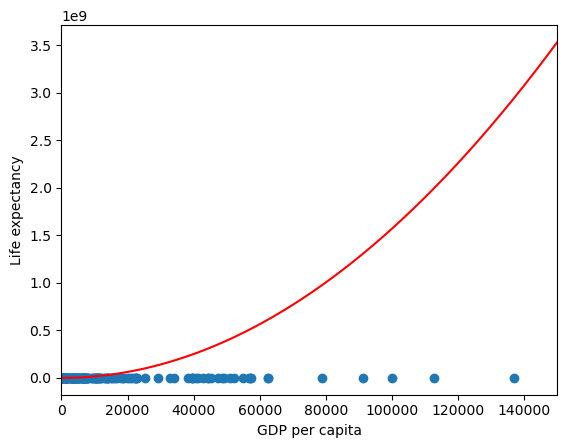

In [7]:
gdp_per_capita = np.multiply(np.divide(nations[:,3], nations[:,6]), 1000000)
plt.scatter(gdp_per_capita, nations[:,4])
plt.xlim(0, 150000)
plt.xlabel("GDP per capita")
plt.ylabel("Life expectancy")


def coeffients(number):
    cV = np.random.uniform(low= -1.0, high=1.0, size=3)
    return cV

def polynomial(x, coeffients):
    y = 0
    for i in range(coeffients.shape[0]):
        y = np.add(y, np.multiply(coeffients[i], np.power(x, i)))

    return y

kArray = np.empty((0,3), float)
best_k = np.empty((0, 3), float)
#lifespan_expected = np.empty((0,1), float)
lifespan_expected = polynomial(gdp_per_capita, kArray[:])
lifespan = nations[:,4]

lowestRMSE = float("inf")


def rmse(orig, expec):
    rmseN = np.sqrt(np.sum(np.power((orig - expec), 2)/orig.shape[0]))
    return rmseN


for i in range(10000):
    kArray = np.append(kArray, [coeffients(3)], axis= 0)
    #lifespan_expected = polynomial(gdp_per_capita, kArray[:])

    current_rmse = rmse(lifespan, lifespan_expected)
    if current_rmse < lowestRMSE:
        lowestRMSE = current_rmse
        best_k = kArray[i]

x = np.linspace(0, 150000, 1000)
polyy = polynomial(x, best_k)

print(lowestRMSE)
print(best_k)

plt.plot(x, polyy, 'r-')
plt.show()
